***Task 2: PREDICTION USING DECISION TREE ALGORITHM***

**Importing libraries and reading the data**



In [ ]:
import numpy as np
import pandas as pd 
ds=pd.read_csv('Iris.csv')

**Getting information about the dataset**

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
ds.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Preprocessing of data**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
lEn=LabelEncoder()
ds.iloc[:,-1]=lEn.fit_transform(ds.iloc[:,-1])
ds

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


**Splitting data**

In [ ]:
var=ds.iloc[:,:-1]
var.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [ ]:
var2=ds.iloc[:,-1]
var2.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(var,var2,test_size=0.2, random_state=50)
xtrain.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
125,126,7.2,3.2,6.0,1.8
98,99,5.1,2.5,3.0,1.1
73,74,6.1,2.8,4.7,1.2
144,145,6.7,3.3,5.7,2.5
21,22,5.1,3.7,1.5,0.4


In [ ]:
ytrain.head()

125    2
98     1
73     1
144    2
21     0
Name: Species, dtype: int64

In [ ]:
ytrain.shape

(120,)

In [ ]:
xtrain.shape

(120, 5)

**Building the model** 

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
ds1=DecisionTreeClassifier()
ds1.fit(xtrain,ytrain)
ds1

DecisionTreeClassifier()

**Comparison between the actual output and the predicted output**

In [ ]:
ytest=np.array(ytest)
ytest

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [ ]:
pred=ds1.predict(xtest)
pred

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

**Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,ytest)

0.9666666666666667

**Classification report** 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.92      0.96        13
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



**Decision tree model visualization**

In [ ]:
from sklearn import tree


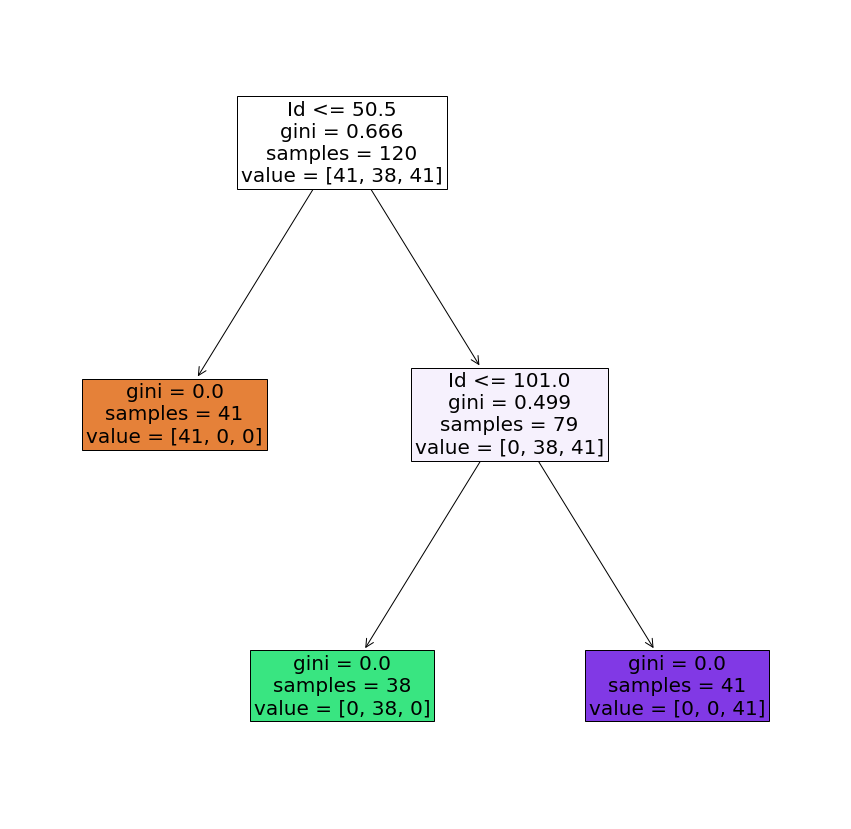

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
dtviz=tree.plot_tree(ds1,feature_names=var.columns,filled=True,fontsize=20)